# CS - 3. Common Algorithms - 3.5 Graph - 3.5.3 Bellman Ford’s Algorithm

# Bellman Ford’s Algorithm

💡Bellman ford’s algorithm is a graph algorithm that finds the shortest path from a source vertex to all other vertices in a graph. It is a dynamic programming algorithm that uses a bottom-up approach to find the shortest path. It is similar to Dijkstra’s algorithm but it can handle negative weights. It is also similar to Floyd-Warshall’s algorithm but it can handle negative weights and it is faster than Floyd-Warshall’s algorithm.

벨만 포드의 알고리즘은 그래프에서 소스 정점에서 다른 모든 정점까지 최단 경로를 찾는 그래프 알고리즘입니다. 상향식 접근 방식을 사용하여 최단 경로를 찾는 동적 프로그래밍 알고리즘입니다. 다익스트라 알고리즘과 유사하지만 음의 가중치를 처리할 수 있습니다. 또한 플로이드-워셜 알고리즘과 유사하지만 음의 가중치를 처리할 수 있으며 플로이드-워셜 알고리즘보다 빠릅니다.

전 글까지 DFS 와 BFS를 다루었는데, 이제는 약간 발전된 알고리즘 

벨만포드 알고리즘

다익스트라 알고리즘

A* 알고리즘 (A 스타 알고리즘)

3가지를 다뤄 볼 것입니다.

 

먼저 3.5.3 벨만 포드 알고리즘에 대해서 알아봅시다.

이 알고리즘은 그래프 내의 모든 정점 간의 최단 경로를 찾는 알고리즘 중 하나입니다.

그래프 내의 한 정점에서 다른 모든 정점까지의 최단 경로를 찾는데 주로 사용됩니다.

 

벨만 포드 알고리즘의 기본 원리는

"Relaxation" 이라는 개념에 기반합니다.

단어의 의미는 휴식, 경감, 완화 인데, 이 글에서는 완화가 적당해 보입니다.

(아래 링크에 Lagrangian Relaxation(라그랑주 완화법)에 대한 설명이 잘 나와있다.

https://charstring.tistory.com/481)

이 글에서 Relaxation은 간선의 가중치를 고려하여 한 정점에서 다른 정점까지의 현재까지 알려진 최단 거리를 업데이트 하는 과정을 의미합니다.

 

그래서 밸만-포드 알고리즘은 이런 순서로 진행됩니다.

1. 시작 정점을 제외한 모든 정점의 거리 값을 무한대로 설정합니다.

2. 모든 간선에 대해, 만약 시작 정점에서 해당 간선의 시작 정점까지의 거리와 해당 간선의 가중치의 합이 해당 간선의 끝 정점까지의 현재 거리보다 작다면, 끝 정점까지의 거리 값을 업데이트 합니다.

3. 이 과정을 정점의 수 -1번 반복합니다.

4. 마지막으로, 음의 사이클이 있는지 확인합니다.

음의 사이클이 있다면, 음의 사이클이 존재한다고 리턴한다.

## In Python

In [10]:
def BellmanFord(graph, V, E, src):
     
    # 1단계 : src부터 모든 버텍스까지의 거리를 무한대로 초기화합니다.
    dis = [float("Inf")] * V
    dis[src] = 0
 
    # 2단계: 모든 가장자리 V - 1배 완화하기
    for i in range(V - 1):
        for j in range(E):
            if dis[graph[j][0]] != float("Inf") and dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]
 
    # 3단계: 음의 사이클 확인
    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dis[x] != float("Inf") and dis[x] + weight < dis[y]:
            print("음의 가중치 사이클 있으요!")
            return

    # 음의 무게 주기를 찾을 수 없다면 거리와 이전 배열을 출력
    print("시작 정점으로 부터 최단거리")
    for i in range(V):
        print("%d\t\t%d" % (i, dis[i]))


In [11]:
# 그래프 정보를 입력합니다. 각 튜플은 (시작 정점, 끝 정점, 가중치)를 의미합니다.
graph = [ (0, 1, -1), (0, 2, 4), (1, 2, 3), (1, 3, 2), 
          (1, 4, 2), (3, 2, 5), (3, 1, 1), (4, 3, -3) ]

# 정점(Vertex)의 수
V = 5

# 간선(Edge)의 수
E = 8

# 시작 정점(Source Vertex)
src = 0

BellmanFord(graph, V, E, src)


시작 정점으로 부터 최단거리
0		0
1		-1
2		2
3		-2
4		1


0 - 0 시작 정점인 0에서 0까지의 최단거리 0

1 -1  시작 정점 0 에서 1까지의 최단거리 -1 

 

그래프를 시각화 한다면 이렇습니다.

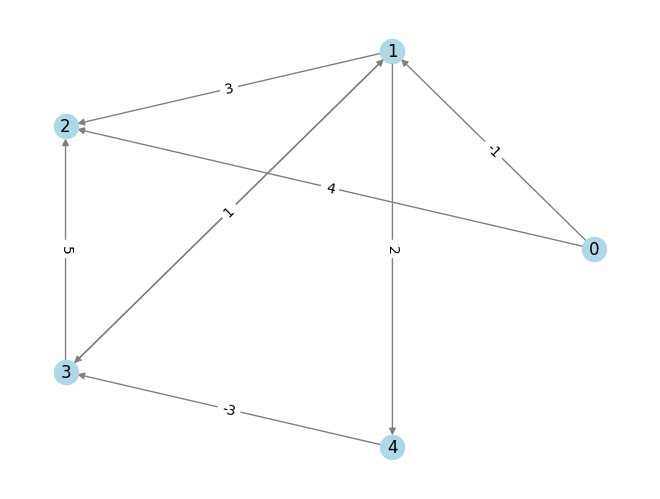

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 정보를 입력합니다. 각 튜플은 (시작 정점, 끝 정점, 가중치)를 의미
edges = [ (0, 1, -1), (0, 2, 4), (1, 2, 3), (1, 3, 2), 
          (1, 4, 2), (3, 2, 5), (3, 1, 1), (4, 3, -3) ]

G = nx.DiGraph()

# 간선 정보를 추가
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 그래프를 시각화
pos = nx.circular_layout(G)  # 원형 레이아웃
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


시작 정점이 0, 도착 정점이 2일때 최단 거리를 계산해보자.

정점 0 에서 정점1을 거쳐 정점2로 이동하는 경로의 총 가중치는 -1 +3 = 2 가된다.

그런데, 정점0 에서 바로 저엊ㅁ2로 이동하는 간선의 가중치는 4이다.

따라서, 0-2 보다 0-1-2 로 이동하는 경로가 더 짧으므로, 시작 정점 0에서 정점 2까지의 최단 거리는 2가 된다.

 

그렇다면 음의 가중치 사이클이 나타난다면 어떻게 될까요?

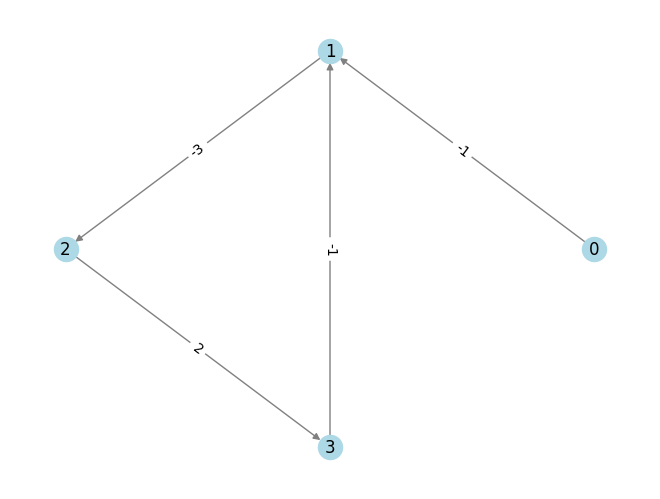

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 정보를 입력합니다. 각 튜플은 (시작 정점, 끝 정점, 가중치)를 의미
edges = [(0, 1, -1), (1, 2, -3), (2, 3, 2), (3, 1, -1)]

G = nx.DiGraph()

# 간선 정보를 추가
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 그래프를 시각화
pos = nx.circular_layout(G)  # 원형 레이아웃
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


이런 그래프가 있다고 가정합시다.

In [ ]:
# 그래프 정보를 입력합니다. 각 튜플은 (시작 정점, 끝 정점, 가중치)를 의미합니다.
graph = [(0, 1, -1), (1, 2, -3), (2, 3, 2), (3, 1, -1)]

# 정점(Vertex)의 수
V = 4

# 간선(Edge)의 수
E = 4

# 시작 정점(Source Vertex)
src = 0

# 벨만-포드 알고리즘 함수를 호출합니다.
BellmanFord(graph, V, E, src)


위 그래프에서는

정점 1에서 시작하여 정점 2, 정점 3을 거쳐 다시 정점 1로 돌아오는 사이클이 존재하며, 이 사이클의 가중치 합은 -1 + 2 - 3 = -2로 음수입니다.

계속 1-2-3-1-2-3-... 이런식으로 가면 계속 최단거리가 짧아지므로 오류에 빠지게 됩니다.

 

## 활용

이 벨만-포드 알고리즘이 유용한점은 '음의 가중치를 계산할 수 있다' 입니다.

다시말해, 음의 가중치를 가진 간선이 포함된 그래프에서도 사용할 수 있으며, 음의 사이클을 감지할 수 있다는 점입니다.

이 알고리즘은 네트워크 라우팅, 통화 거래, 경로 찾기 등 다양한 상황에서 활용할 수 있습니다.